# What are we trying to do?

**Mystery equation**: `y = 0.1 * x + 0.3 + noise`

**Model**: `y = W * x + b`

**Objective**: Given enough (x, y) value samples, figure out the value of W (weight) and b (bias).

In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

In [2]:
# Create input data using numpy
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise

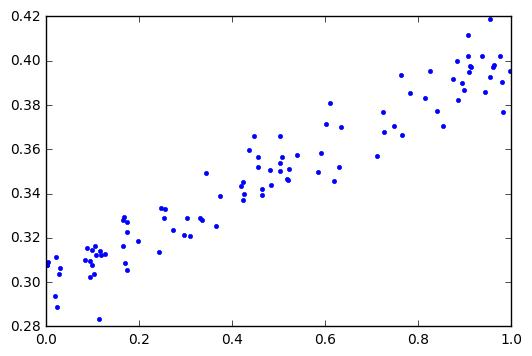

In [3]:
pylab.plot(x_data, y_data, '.')

## Build inference graph

In [4]:
# Create variables W (weight) and b (bias) that compute y_data = W * x + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name="Weight")
b = tf.Variable(tf.zeros([1]), name="Bias")
y = W * x_data + b

print(W.name, W)
print(b.name, b)

Weight:0 <tensorflow.python.ops.variables.Variable object at 0x10cc26cc0>
Bias:0 <tensorflow.python.ops.variables.Variable object at 0x10cc26c18>


## Build training graph

In [52]:
# Operation that calculates loss
loss = tf.reduce_mean(tf.square(y - y_data))

# Create an optimizer
optimizer = tf.train.GradientDescentOptimizer(0.1)

# Operation that minimizes loss
train = optimizer.minimize(loss)

# Operation that initializes all the variables
init = tf.initialize_all_variables()

print("Loss:", loss)
print("Optimizer:", optimizer)
print("Train:", train)
print("Init:", init)

Loss: Tensor("Mean_9:0", shape=(), dtype=float32)
Optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x10d0169e8>
Train: name: "GradientDescent_4"
op: "NoOp"
input: "^GradientDescent_4/update_Weight/ApplyGradientDescent"
input: "^GradientDescent_4/update_Bias/ApplyGradientDescent"

Init: name: "init_9"
op: "NoOp"
input: "^Weight/Assign"
input: "^Bias/Assign"
input: "^beta1_power/Assign"
input: "^beta2_power/Assign"
input: "^Weight/Adam/Assign"
input: "^Weight/Adam_1/Assign"
input: "^Bias/Adam/Assign"
input: "^Bias/Adam_1/Assign"
input: "^Weight/Ftrl/Assign"
input: "^Weight/Ftrl_1/Assign"
input: "^Bias/Ftrl/Assign"
input: "^Bias/Ftrl_1/Assign"
input: "^Weight/Ftrl_2/Assign"
input: "^Weight/Ftrl_3/Assign"
input: "^Bias/Ftrl_2/Assign"
input: "^Bias/Ftrl_3/Assign"
input: "^Weight/Ftrl_4/Assign"
input: "^Weight/Ftrl_5/Assign"
input: "^Bias/Ftrl_4/Assign"
input: "^Bias/Ftrl_5/Assign"
input: "^Weight/Adagrad/Assign"
input: "^Bias/Adagrad/Assign"



In [48]:
# Uncomment to VISUALISE the neural network.

# print(tf.get_default_graph().as_graph_def())

## Create session and launch the graph

In [49]:
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

print(sess.run([W, b]))

[array([ 0.13542426], dtype=float32), array([ 0.], dtype=float32)]


## Perform training

In [50]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run([W, b]))

print(sess.run([W, b]))

0 [array([ 0.26364648], dtype=float32), array([ 0.17474757], dtype=float32)]
20 [array([ 0.14596558], dtype=float32), array([ 0.27628872], dtype=float32)]
40 [array([ 0.11213099], dtype=float32), array([ 0.29448202], dtype=float32)]
60 [array([ 0.10390897], dtype=float32), array([ 0.29890281], dtype=float32)]
80 [array([ 0.10191021], dtype=float32), array([ 0.29997748], dtype=float32)]
100 [array([ 0.10142434], dtype=float32), array([ 0.30023873], dtype=float32)]
120 [array([ 0.10130619], dtype=float32), array([ 0.30030227], dtype=float32)]
140 [array([ 0.10127749], dtype=float32), array([ 0.30031767], dtype=float32)]
160 [array([ 0.10127052], dtype=float32), array([ 0.30032143], dtype=float32)]
180 [array([ 0.10126884], dtype=float32), array([ 0.30032235], dtype=float32)]
200 [array([ 0.10126841], dtype=float32), array([ 0.30032256], dtype=float32)]
[array([ 0.10126841], dtype=float32), array([ 0.30032256], dtype=float32)]


## Test to see if we're successful

(0, 1.0)

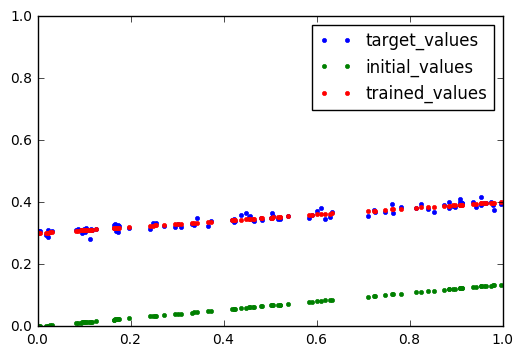

In [51]:
pylab.plot(x_data, y_data, '.', label="target_values")
pylab.plot(x_data, y_initial_values, '.', label="initial_values")
pylab.plot(x_data, sess.run(y), '.', label="trained_values")
pylab.legend()
pylab.ylim(0, 1.0)